#  Clasificación de imágenes con IA

### El contenido de este notebook fue tomado de: [Raul Ramos Pollan](https://github.com/rramosp/20181.ai) y [Fabio Martinez Carrillo](https://github.com/famarcar/ai_20181_student)

En este notebook vamos a realizar la practica y entendimiento de como hacer un proceso de clasificacion de las imagenes con IA's

Para empezar necesitamos tener un dataset o banco de datos para trabajar.

**Carga e inspección del dataset mnist1.5k.csv.gz**

Vamos a cargar este dataset que contiene imágenes de dígitos para hacer una tarea de reconocimiento de caracteres. Cada línea del fichero contiene 785 valores, el primero es la etiqueta del dígito representado y los 784 restantes los pixeles de una imagen de 28x28 representando un dígito. Fíjate cómo separamos la columna 0 del resto.

Cada pixel tiene un valor de luminosidad entre 0 y 255.

Primeramente debemos importar las librerias que vamos a usar.


In [2]:
import numpy as np #Libreria de numpy para tareas matematicas eficazes
import matplotlib.pyplot as plt #Librearia para mostrar iamgenes y resultados
import pandas as pd #Libreria para cargar los datos y mostrarlos de forma bonita en el notebook
%matplotlib inline 

In [3]:
#Carga del dataset en nuestro codigo
mnist = pd.read_csv("mnist1.5k.csv.gz", header=None).values.astype(float)

print("dimension de los datos originales", mnist.shape)

d=mnist[:,1:785] #Esta variable corresponde a una matrix donde cada fila es una imagen y cada columna es un pixel

c=mnist[:,0] #Esta variable corresponde a un vector donde cada elemento es la etiqueta de la imagen

print("dimension de las imagenes y las clases", d.shape, c.shape)

print("luminosidad maxima", np.max(d))

print("luminosidad minimo", np.min(d))

('dimension de los datos originales', (1500, 785))
('dimension de las imagenes y las clases', (1500, 784), (1500,))
('luminosidad maxima', 255.0)
('luminosidad minimo', 0.0)


Mostramos aleatoriamente algunos de los dígitos. Fíjate cómo usamos `reshape` para convertir un vector de 784 elementos en una matriz de 28x28 e interpretarla como una imagen.

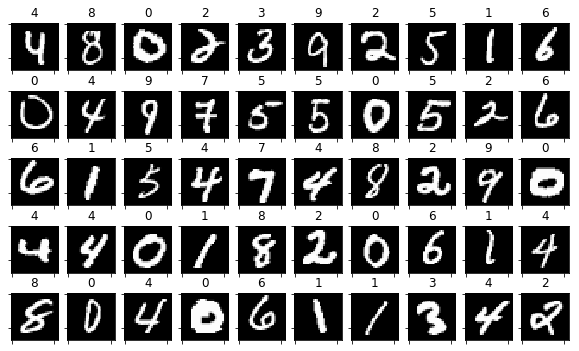

In [4]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Vemos también la distribución de clases, es decir, cuántas imágenes tenemos para cada dígito.

In [5]:
print "digito   número de imágenes"
for i in np.unique(c):
    print "   ",int(i), "   ", np.sum(c==i)

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


## Un problema en Inteligencia Artificial con los datos
**Estabilidad númerica**: Agregar pequeños valores a una cantidad grande de datos puede introducion un monton de errores.

## La solucion
Tener variables con media de 0 $\mu(X_i) =0$ ay varianza iguales $\sigma(X_i) = \sigma(X_j)$

In [6]:
# Normalizar los datos con zero mean
pixel_depth = np.max(d)
#(ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
d = (d- pixel_depth / 2)/pixel_depth
print('Mean:', np.mean(d))
print('Standard deviation:', np.std(d))

('Mean:', -0.36804179338402043)
('Standard deviation:', 0.30949845562855866)


** Entrenamiento y predicción **

Usamos el algoritmo **Naive Bayes** de clasificación para tratar de identificar automáticamente los dígitos. Fíjate como dividimos primero las imágenes y las etiquetas en un 80% para train y un 20% para test. ¿Qué tal se comporta el algoritmo? ¿Clasifica bien los dígitos? ¿Qué dígitos clasifica peor? ¿Por qué crees que es?

In [7]:
from sklearn.model_selection import train_test_split

test_size = 0.2
#by defautl is 0.25 in test.

d_train, d_test, c_train, c_test = train_test_split(d, c, test_size=test_size)
print d_train.shape, d_test.shape
print c_train.shape, c_test.shape

(1200, 784) (300, 784)
(1200,) (300,)


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier


test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(d,c,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

#GaussianNB()
#DecisionTreeClassifier()
#RandomForestClassifier()
#DecisionTreeClassifier() 
g = DecisionTreeClassifier()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 1.0
acierto en test  0.673333333333


In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *

s = cross_val_score(GaussianNB(), d, c, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.601 (+/- 0.02409)
